Complete the exercises below For **Assignment #4**.

Use **Markdown** cells for the non-code answers.

In this assignment we will work with the data underlying the *FiveThirtyEight* article ["Higher Rates Of Hate Crimes Are Tied To Income Inequality"](https://fivethirtyeight.com/features/higher-rates-of-hate-crimes-are-tied-to-income-inequality/).

Load the `tidymodels`, `readr`, and `moderndive` packages in the cell below.

In [1]:
# Import necessary packages
library(tidymodels)
library(readr)
library(moderndive)

Warning message:
“Your system is mis-configured: ‘/var/db/timezone/localtime’ is not a symlink”
Warning message:
“‘/var/db/timezone/localtime’ is not identical to any known timezone file”
── Attaching packages ────────────────────────────────────── tidymodels 1.2.0 ──

✔ broom        1.0.6     ✔ recipes      1.1.0
✔ dials        1.3.0     ✔ rsample      1.2.1
✔ dplyr        1.1.4     ✔ tibble       3.2.1
✔ ggplot2      3.5.1     ✔ tidyr        1.3.1
✔ infer        1.0.7     ✔ tune         1.2.1
✔ modeldata    1.4.0     ✔ workflows    1.1.4
✔ parsnip      1.2.1     ✔ workflowsets 1.1.0
✔ purrr        1.0.2     ✔ yardstick    1.3.1

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ purrr::discard() masks scales::discard()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
✖ recipes::step()  masks stats::step()
• Search for functions across packages at https://www.tidymodels.org/find/


Attaching package: ‘readr’


The following

We can read the data from a **CSV file** at the following URL: [http://bit.ly/2ItxYg3](http://bit.ly/2ItxYg3).

Use the `read_csv` function to read the data into our R session. Call the new table `hate_crimes`.

In [2]:
# Read data
hate_crimes = read_csv("http://bit.ly/2ItxYg3")

# View data
glimpse(hate_crimes)

Rows: 51 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (5): state, median_house_inc, trump_support, unemployment, urbanization
dbl (4): share_pop_metro, hs, hate_crimes, income

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 51
Columns: 9
$ state            <chr> "New Mexico", "Maine", "New York", "Illinois", "Delaw…
$ median_house_inc <chr> "low", "low", "low", "low", "high", "high", "high", "…
$ share_pop_metro  <dbl> 0.69, 0.54, 0.94, 0.90, 0.90, 1.00, 0.87, 0.86, 0.97,…
$ hs               <dbl> 83, 90, 85, 86, 87, 85, 89, 90, 81, 91, 89, 89, 87, 8…
$ hate_crimes      <dbl> 0.295, 0.616, 0.351, 0.195, 0.323, 0.095, 0.833, 0.67…
$ trump_support    <chr> "low", "low", "low", "low", "low", "low", "low", "low…
$ unemployment     <chr> "high", "low", "low", "high", "low", "high", "high", …
$ urbanization     <chr> "low", "low", "high", "high", "high", "high", "high",…
$ income           <dbl> 46686, 51710, 54310, 54916, 57522, 58633, 58875, 5906…


Next, let’s add the high-school degree variable into the mix by creating a scatterplot showing:

- Income on the y-axis (this is the `income` variable)
- Percent of adults 25 or older with a high school degree on the x-axis (this is the `hs` variable)
- The points colored by level of urbanization in a region (this is the variable `urbanization`)


**In addition, add a line of best fit (regression line) for each level of the variable urbanization (one for “low”, one for “high”).**

*Add the regression lines to the plot using the `geom_parallel_slopes` function from the `moderndive` package. This function will draw the regression lines based on fitting a regression model with parallel slopes (i.e., with no interaction between `hs` and `urbanization`).*

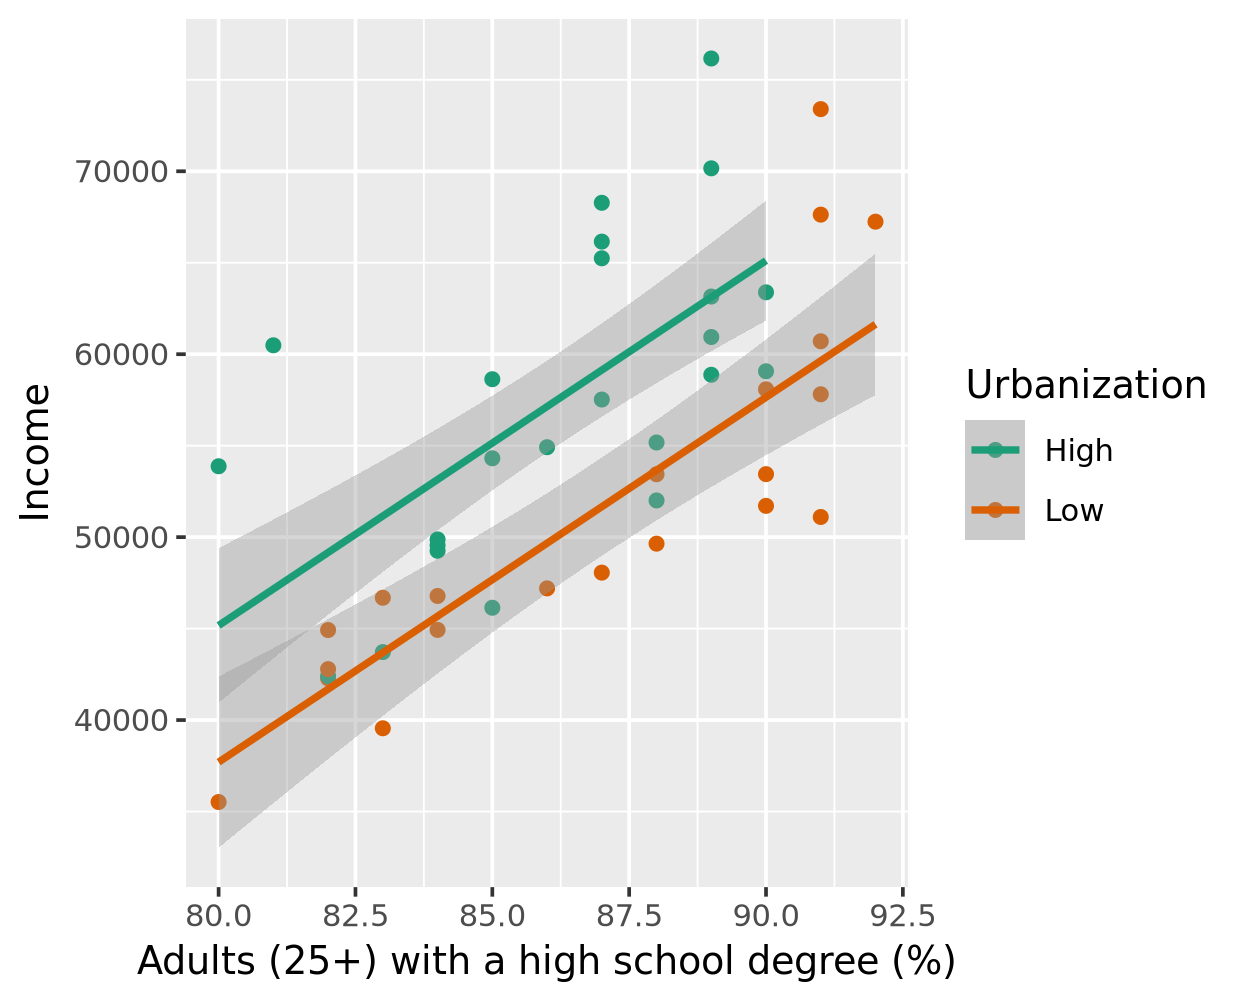

In [3]:
# Plot data without missing values as specified
# Parallel slopes
ggplot(drop_na(hate_crimes), aes(x=hs, y=income, color=urbanization)) +
    geom_point() +
    scale_color_brewer(palette="Dark2",
                       labels=c("low"="Low", "high"="High"),
                       name="Urbanization") +
    xlab("Adults (25+) with a high school degree (%)") +
    ylab("Income") +
    geom_parallel_slopes()

❓Which regression line (high urbanization or low urbanization) appears to have the larger intercept?

**Answer:**

The regression line corresponding to high urbanization appears to have a larger intercept coefficient.

Now let’s create a second scatterplot using the same variables, but this time draw the regression lines using `geom_smooth(method = "lm")`, which will allow for separate, non-parallel slopes for each urbanization group. 

**Code your scatter plot in the cell below.**

`geom_smooth()` using formula = 'y ~ x'


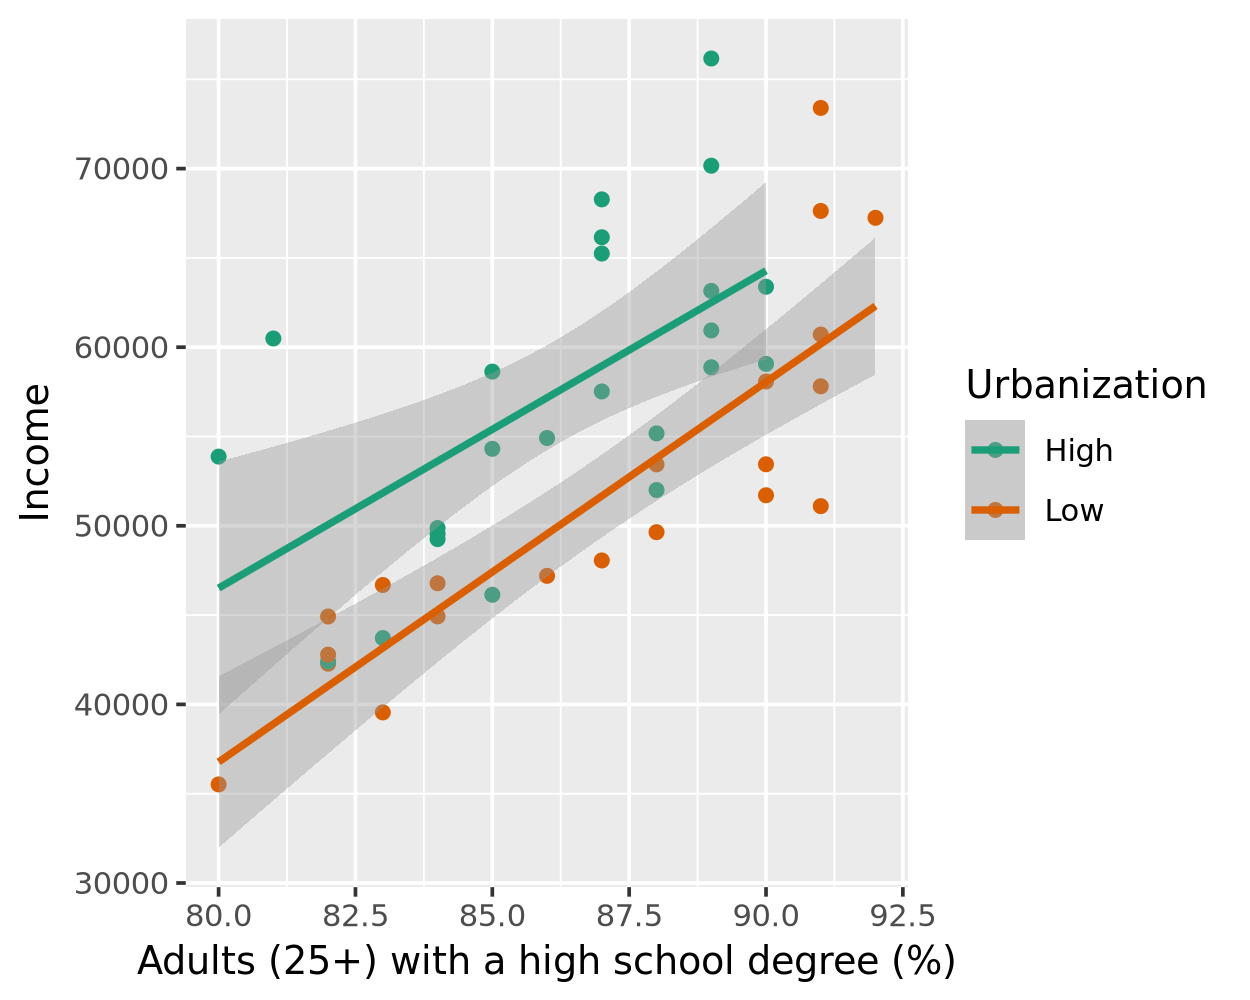

In [4]:
# Plot data without missing values as specified
# Non-parallel slopes
ggplot(drop_na(hate_crimes), aes(x=hs, y=income, color=urbanization)) +
    geom_point() +
    scale_color_brewer(palette="Dark2",
                       labels=c("low"="Low", "high"="High"),
                       name="Urbanization") +
    xlab("Adults (25+) with a high school degree (%)") +
    ylab("Income") +
    geom_smooth(method="lm")

❓Based on visually comparing the two models shown above, do you think it would be best to run a “parallel slopes” model (i.e. a model that estimates one shared slope for the two levels of urbanization), or a more complex “interaction model” (i.e. a model that estimates a separate slope for the two levels of urbanization)?

**Answer:**

Upon inspection of both plots visually, it would be better to use a parallel slope model. The interaction model allows for a more complex relationship that could lead to more accurate predictions, but this interaction relationship does not appear to be significant upon visual comparison of the two non-parallel slopes. With the parallel slope model, the predicted values will be roughly equal, but the level of confidence in these predicted values will be significantly higher. Past that, we can directly compare the intercept values as the slopes will be exactly the same.

Fit the following two regression models that examine the relationship between household `income` (as response variable), and high-school education (`hs`) and `urbanization` as explanatory variables:

1. A parallel slopes model (i.e., no interaction between `hs` and `urbanization`). ❗️Save the data recipe and model under the variables `ps_rec` and `ps_mod`, respectively. 
1. A non-parallel slopes model (i.e., allow `hs` and `urbanization` to interact in your model). ❗️Save the data recipe and model under the variable: `nps_rec` and `nps_mod`, respectively.

**Code you your models in the cell below.**

In [5]:
# parallel slopes model

ps_rec = recipe(income ~ hs + urbanization, data = hate_crimes) |> 
    step_naomit(everything()) |>   # remove missing values
    step_dummy(urbanization) |>    # dummy encode the urbanization variable
    prep()                         # run the recipe on the training data provided

mod = linear_reg() |> set_engine('lm')

ps_mod = mod |> fit(income ~ ., juice(ps_rec))

tidy(ps_mod)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-113725.193,23552.9187,-4.828497,1.624694e-05
hs,1986.794,272.9303,7.279490,3.930730e-09
urbanization_low,-7333.326,1857.6592,-3.947616,2.744526e-04


In [6]:
# non-parallel slopes model

nps_rec = recipe(income ~ hs + urbanization, data = hate_crimes) |>
    step_interact(~ starts_with("urbanization"):hs) |> # add interaction term
    step_naomit(everything()) |>   # remove missing values
    step_dummy(urbanization) |>    # dummy encode the urbanization variable
    prep()                         # run the recipe on the training data provided

mod = linear_reg() |> set_engine('lm')

nps_mod = mod |> fit(income ~ ., juice(nps_rec))

tidy(nps_mod)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-95647.4274,39937.8800,-2.3949050,0.0209485906
hs,1776.9938,463.2497,3.8359312,0.0003953977
urbanizationlow_x_hs,323.9987,575.6838,0.5628067,0.5764231616
urbanization_low,-35393.9651,49893.5228,-0.7093900,0.4818248864


The following code creates a table of your model predictions over the training data. Calculate the [coefficient of determination](https://en.wikipedia.org/wiki/Coefficient_of_determination) (R<sup>2</sup>) for each model:

```r
rbind(
    augment(ps_mod, juice(ps_rec)) |> select(income, .pred, .resid) |> mutate(model = "parallel_slopes"),
    augment(nps_mod, juice(nps_rec)) |> select(income, .pred, .resid) |> mutate(model = "interaction")
)
```

1. Group rows by the `model` variable (use the `group_by` function).
1. Calculate the variance of income over the variance of your predictions for each model using the "grouped" data from the step above (use `summarize(r_squared = var(.pred) / var(income))`).

In [7]:
# Group table of model prodictions by model and calculate R^2 values
rbind(
    augment(ps_mod, juice(ps_rec)) |> select(income, .pred, .resid) |> mutate(model = "parallel_slopes"),
    augment(nps_mod, juice(nps_rec)) |> select(income, .pred, .resid) |> mutate(model = "interaction")
) |> group_by(model) |>
    summarize(r_squared = var(.pred) / var(income))

model,r_squared
<chr>,<dbl>
interaction,0.5746731
parallel_slopes,0.5716112


🎶 Note: you can also use the `glance` function with a model as input to find the coefficient of determination.

In [8]:
# Find R^2 by model through glance
glance(ps_mod)
glance(nps_mod)

r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual,nobs
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
0.5716112,0.5525717,6325.667,30.02238,5.204241e-09,2,-486.6739,981.3479,988.8327,1800633086,45,48


r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual,nobs
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
0.5746731,0.5456735,6374.244,19.81661,2.814509e-08,3,-486.5018,983.0035,992.3595,1787763166,44,48


❓Compare the adjusted proportion of variance accounted for in each model. Based on this comparison, which model do you prefer? Why? 

**Answer:**

The R^2 value increases by approximately 0.003 with the inclusion of the interaction term. However, given the negligible magnitude of this difference and the slightly lower adjusted R^2 value, the simpler model (without the interaction term) is preferable due to its simplicity with no significant differences in fit.

❓Using your preferred model, based on your regression model parameters (and the data visualizations), is `income` greater in states that have lower or higher levels of `urbanization`? By how much?

**Hint:** use the `tidy` function with your model as input to access the parameters in a nice table.

**Answer:**

In [9]:
# Examine model parameters
# hs estimate of 1986.79
# urbanization_low estimate of 7333.33
tidy(ps_mod)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-113725.193,23552.9187,-4.828497,1.624694e-05
hs,1986.794,272.9303,7.279490,3.930730e-09
urbanization_low,-7333.326,1857.6592,-3.947616,2.744526e-04


Income is greater in states with a higher level of urbanization, and according to the model results without using an interaction term, this difference is approximately by $7,333.33.

❓For every one percentage point increase of high-school educated adults in a state (`hs` variable), what is the associated average increase in `income`?

**Answer:**

According to the model results without using an interaction term, for every one percentage point increase of high school educated adults in a state, the increase in average income is $1986.79.